In [1]:
import os
import numpy as np
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import colormaps as cmaps
from colormaps.utils import concat
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.dpi'] = 72

# Testing HEALPix SCREAM 3H Data

This notebook tests reading and visualizing HEALPix SCREAM 3H data.

In [2]:
in_dir = '/pscratch/sd/w/wcmca1/hackathon/healpix/scream_cess2/'
# in_file = f'{in_dir}SCREAMv1_ne120_INSTANT_3H_zoom8_20190810_20190811.zarr'
in_file = f'{in_dir}SCREAMv1_ne120_INSTANT_3H_zoom8_20190801_20200410.zarr'
print(f"{in_file} exists: {os.path.exists(in_file)}")

# Monthly mean file
mon_file = f'{in_dir}SCREAMv1_ne120_AVERAGE_1M_zoom8_20190801_20200410.zarr'
print(f"Monthly-mean file exists: {os.path.exists(mon_file)}")

/pscratch/sd/w/wcmca1/hackathon/healpix/scream_cess2/SCREAMv1_ne120_INSTANT_3H_zoom8_20190801_20200410.zarr exists: True
Monthly-mean file exists: True


In [3]:
# Read data
ds = xr.open_zarr(in_file)
ds = ds.pipe(egh.attach_coords)
ds 

<xarray.Dataset> Size: 2TB
Dimensions:   (time: 2020, cell: 786432, lev: 37)
Coordinates:
  * time      (time) datetime64[ns] 16kB 2019-08-01 ... 2020-04-10T09:00:00
    crs       int64 8B 0
  * cell      (cell) int32 3MB 0 1 2 3 4 ... 786427 786428 786429 786430 786431
    lat       (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.1492
    lon       (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Dimensions without coordinates: lev
Data variables: (12/18)
    hur       (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    hus       (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    huss      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    omega     (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    omega500  (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    p         (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    ...        ...
    ua        (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    uivt      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    va        (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    vivt      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    z         (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    z500      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
Attributes:
    grid_mapping:      crs
    healpix_nest:      True
    healpix_npix:      786432
    healpix_nside:     256
    healpix_order:     8
    original_grid:     unstructured
    remapping_method:  delaunay_triangulation

In [ ]:
# Read monthly data
dsmon = xr.open_zarr(mon_file)
dsmon

<xarray.Dataset> Size: 9GB
Dimensions:                   (time: 8, cell: 786432, lev: 37)
Coordinates:
  * cell                      (cell) int32 3MB 0 1 2 3 ... 786429 786430 786431
    crs                       int64 8B ...
  * time                      (time) datetime64[ns] 64B 2019-09-01 ... 2020-0...
Dimensions without coordinates: lev
Data variables: (12/29)
    LongwaveCloudForcing      (time, cell) float32 25MB dask.array<chunksize=(1, 262144), meta=np.ndarray>
    ShortwaveCloudForcing     (time, cell) float32 25MB dask.array<chunksize=(1, 262144), meta=np.ndarray>
    cldfrac_tot_for_analysis  (time, cell, lev) float32 931MB dask.array<chunksize=(1, 262144, 37), meta=np.ndarray>
    hflsd                     (time, cell) float32 25MB dask.array<chunksize=(1, 262144), meta=np.ndarray>
    hfssd                     (time, cell) float32 25MB dask.array<chunksize=(1, 262144), meta=np.ndarray>
    hur                       (time, cell, lev) float32 931MB dask.array<chunksize=(1, 262144, 37), meta=np.ndarray>
    ...                        ...
    ua                        (time, cell, lev) float32 931MB dask.array<chunksize=(1, 262144, 37), meta=np.ndarray>
    uivt                      (time, cell) float32 25MB dask.array<chunksize=(1, 262144), meta=np.ndarray>
    va                        (time, cell, lev) float32 931MB dask.array<chunksize=(1, 262144, 37), meta=np.ndarray>
    vivt                      (time, cell) float32 25MB dask.array<chunksize=(1, 262144), meta=np.ndarray>
    z                         (time, cell, lev) float32 931MB dask.array<chunksize=(1, 262144, 37), meta=np.ndarray>
    z500                      (time, cell) float32 25MB dask.array<chunksize=(1, 262144), meta=np.ndarray>
Attributes:
    grid_mapping:      crs
    healpix_nest:      True
    healpix_npix:      786432
    healpix_nside:     256
    healpix_order:     8
    original_grid:     unstructured
    remapping_method:  delaunay_triangulation

<Figure size 460.8x345.6 with 0 Axes>

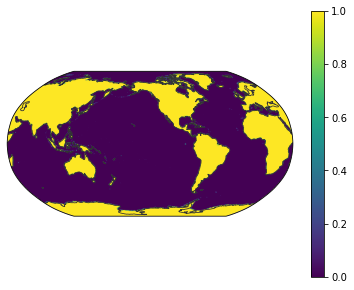

In [29]:
im = egh.healpix_show(dsmon.landfrac.isel(time=0))
plt.colorbar(im)

In [13]:
# Add landfrac from monthly data to instantaneous data
ds['landfrac'] = dsmon.landfrac.isel(time=0)
ds

<xarray.Dataset> Size: 2TB
Dimensions:   (time: 2020, cell: 786432, lev: 37)
Coordinates:
  * time      (time) datetime64[ns] 16kB 2019-08-01 ... 2020-04-10T09:00:00
    crs       int64 8B 0
  * cell      (cell) int32 3MB 0 1 2 3 4 ... 786427 786428 786429 786430 786431
    lat       (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.1492
    lon       (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Dimensions without coordinates: lev
Data variables: (12/19)
    hur       (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    hus       (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    huss      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    omega     (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    omega500  (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    p         (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    ...        ...
    uivt      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    va        (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    vivt      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    z         (time, cell, lev) float32 235GB dask.array<chunksize=(24, 262144, 37), meta=np.ndarray>
    z500      (time, cell) float32 6GB dask.array<chunksize=(24, 262144), meta=np.ndarray>
    landfrac  (cell) float32 3MB dask.array<chunksize=(262144,), meta=np.ndarray>
Attributes:
    grid_mapping:      crs
    healpix_nest:      True
    healpix_npix:      786432
    healpix_nside:     256
    healpix_order:     8
    original_grid:     unstructured
    remapping_method:  delaunay_triangulation

In [14]:
ds.time.isel(time=slice(0, 24))

<xarray.DataArray 'time' (time: 24)> Size: 192B
array(['2019-08-01T00:00:00.000000000', '2019-08-01T03:00:00.000000000',
       '2019-08-01T06:00:00.000000000', '2019-08-01T09:00:00.000000000',
       '2019-08-01T12:00:00.000000000', '2019-08-01T15:00:00.000000000',
       '2019-08-01T18:00:00.000000000', '2019-08-01T21:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-02T03:00:00.000000000',
       '2019-08-02T06:00:00.000000000', '2019-08-02T09:00:00.000000000',
       '2019-08-02T12:00:00.000000000', '2019-08-02T15:00:00.000000000',
       '2019-08-02T18:00:00.000000000', '2019-08-02T21:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-03T03:00:00.000000000',
       '2019-08-03T06:00:00.000000000', '2019-08-03T09:00:00.000000000',
       '2019-08-03T12:00:00.000000000', '2019-08-03T15:00:00.000000000',
       '2019-08-03T18:00:00.000000000', '2019-08-03T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 192B 2019-08-01 ... 2019-08-03T21:00:00
    crs      int64 8B 0

In [15]:
ds.time[-10:]

<xarray.DataArray 'time' (time: 10)> Size: 80B
array(['2020-04-09T06:00:00.000000000', '2020-04-09T09:00:00.000000000',
       '2020-04-09T12:00:00.000000000', '2020-04-09T15:00:00.000000000',
       '2020-04-09T18:00:00.000000000', '2020-04-09T21:00:00.000000000',
       '2020-04-10T00:00:00.000000000', '2020-04-10T03:00:00.000000000',
       '2020-04-10T06:00:00.000000000', '2020-04-10T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 80B 2020-04-09T06:00:00 ... 2020-04-10T09:...
    crs      int64 8B 0

In [16]:
# ds.time[-10:]
p_levs = ds.p_levs.compute()
p_levs

<xarray.DataArray 'p_levs' (lev: 37)> Size: 148B
array([   100.,    200.,    300.,    500.,    700.,   1000.,   2000.,
         3000.,   5000.,   7000.,  10000.,  12500.,  15000.,  17500.,
        20000.,  22500.,  25000.,  30000.,  35000.,  40000.,  45000.,
        50000.,  55000.,  60000.,  65000.,  70000.,  75000.,  77500.,
        80000.,  82500.,  85000.,  87500.,  90000.,  92500.,  95000.,
        97500., 100000.], dtype=float32)
Coordinates:
    crs      int64 8B 0
Dimensions without coordinates: lev
Attributes:
    cell_methods:   time: point
    long_name:      MISSING
    standard_name:  MISSING
    units:          Pa

In [17]:
# ds.time.dt.strftime('%Y')
ds.time.isel(time=0).dt.strftime('%Y-%m-%d %H:%M').item()

'2019-08-01 00:00'

In [18]:
ds.prw.attrs

{'cell_methods': 'time: point',
 'long_name': 'total water vapor path',
 'standard_name': 'atmosphere_mass_content_of_water_vapor',
 'units': 'kg/(m^2)'}

In [19]:
z_idx = np.argwhere(p_levs.values == 85000)[0][0]
ds.hus.sel(lev=z_idx)

<xarray.DataArray 'hus' (time: 2020, cell: 786432)> Size: 6GB
dask.array<getitem, shape=(2020, 786432), dtype=float32, chunksize=(24, 262144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 16kB 2019-08-01 ... 2020-04-10T09:00:00
    crs      int64 8B 0
  * cell     (cell) int32 3MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Attributes:
    cell_methods:   time: point
    long_name:      water vapor mixing ratio
    standard_name:  humidity_mixing_ratio
    units:          kg/kg

<Figure size 460.8x345.6 with 0 Axes>

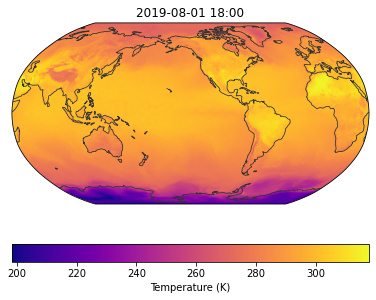

In [20]:
itime = 6
VAR = ds.tas.isel(time=itime)
im = egh.healpix_show(VAR, cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Temperature ({ds.tas.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

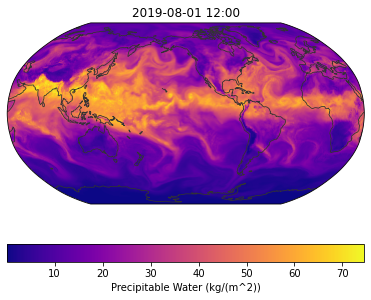

In [21]:
itime = 4
VAR = ds.prw.isel(time=itime)
im = egh.healpix_show(VAR.where(VAR > 0), cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

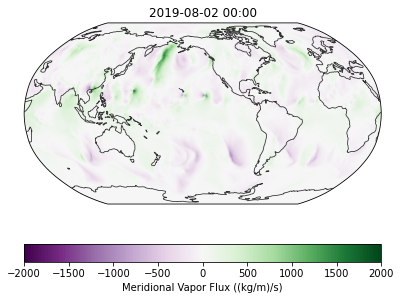

In [22]:
itime = 8
VAR = ds.vivt.isel(time=itime)
im = egh.healpix_show(VAR, vmin=-2000, vmax=2000, cmap='PRGn')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Meridional Vapor Flux ({ds.vivt.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

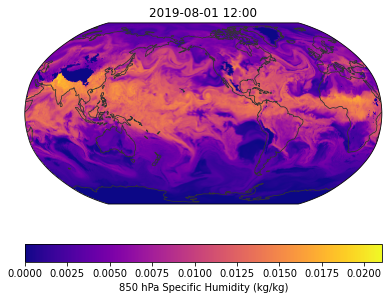

In [23]:
itime = 4
iplev = 85000
z_idx = np.argwhere(p_levs.values == iplev)[0][0]
ds.hus.sel(lev=z_idx)
VAR = ds.hus.isel(time=itime, lev=z_idx)
im = egh.healpix_show(VAR, cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'{iplev/100:.0f} hPa Specific Humidity ({ds.hus.attrs["units"]})')

In [24]:
# itime = 25
# fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=-137)})
# def egh_plot(data, ax, **kwargs):
#     ax.set_title(data.name)
#     ax.set_global()
#     im = egh.healpix_show(data, ax=ax, **kwargs)
#     plt.colorbar(im, ax=ax)
#     ax.coastlines()

# time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
# pr = ds.pr.isel(time=itime) * 3600000  # Convert from mm/s to mm/h
# tb = olr_to_tb(ds.rlut.isel(time=itime))
# egh_plot(pr, ax=ax0, norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
# egh_plot(tb, ax=ax1, cmap=cmap_tb, vmin=180, vmax=315)
# fig.suptitle(f"{time_str}", fontsize=16)

<Figure size 460.8x345.6 with 0 Axes>

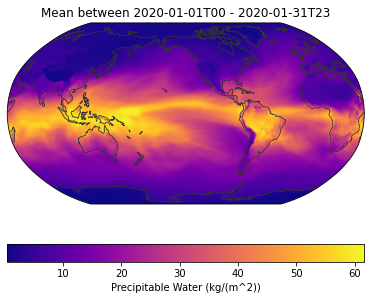

In [25]:
time_str1 = '2020-01-01T00'
time_str2 = '2020-01-31T23'
# time_str1 = '2019-08-10T00'
# time_str2 = '2019-08-11T23'
VAR = ds.prw.sel(time=slice(time_str1, time_str2))
VAR_avg = VAR.mean(dim='time')
im = egh.healpix_show(VAR_avg, cmap='plasma')
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

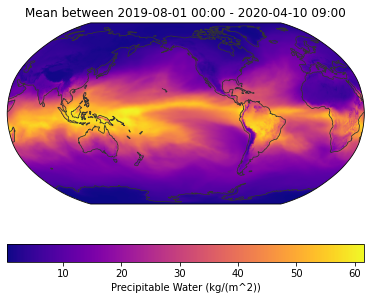

In [26]:
VAR = ds.prw.sel(time=slice(time_str1, time_str2))
VAR_avg = VAR.mean(dim='time')
im = egh.healpix_show(VAR_avg, cmap='plasma')
time_str1 = ds.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
time_str2 = ds.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')

In [44]:
tas_land = ds.tas.where((ds.landfrac > 0.9) & (ds.lat > -60))
tas_land_monthly = tas_land.groupby('time.month').mean()
tas_land_monthly

<xarray.DataArray 'tas' (month: 9, cell: 786432)> Size: 28MB
dask.array<transpose, shape=(9, 786432), dtype=float32, chunksize=(1, 262144), chunktype=numpy.ndarray>
Coordinates:
    crs      int64 8B 0
  * cell     (cell) int32 3MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
  * month    (month) int64 72B 1 2 3 4 8 9 10 11 12
Attributes:
    cell_methods:   time: point
    long_name:      2 meter air temperature
    standard_name:  air_temperature
    units:          K

<Figure size 460.8x345.6 with 0 Axes>

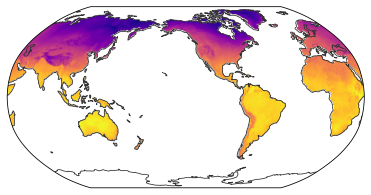

In [45]:
egh.healpix_show(tas_land_monthly.isel(month=0), cmap='plasma')

In [46]:
tas_land_timeseries = tas_land.mean(dim='cell').compute()

(0.0, 30.0)

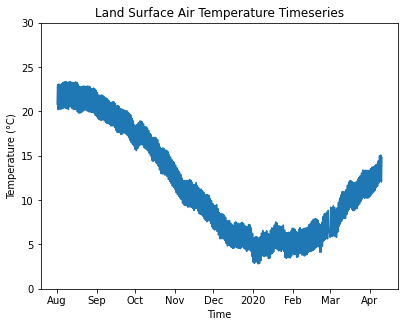

In [52]:
(tas_land_timeseries[2:] - 273.15).plot()
plt.title('Land Surface Air Temperature Timeseries')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.ylim(0, 30)

<Figure size 460.8x345.6 with 0 Axes>

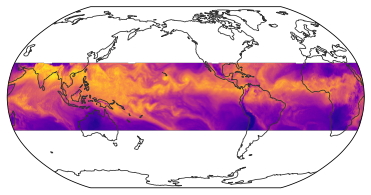

In [ ]:
prw_tropics = ds.prw.where((ds.lat > -30) & (ds.lat < 30))
egh.healpix_show(prw_tropics.isel(time=10), cmap='plasma')

In [55]:
prw_tropics_timeseries = prw_tropics.mean(dim='cell').compute()

Text(0, 0.5, 'Precipitable Water (mm)')

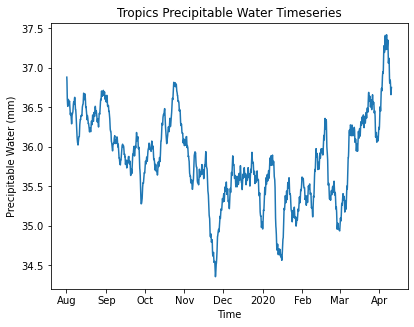

In [56]:
(prw_tropics_timeseries[2:]).plot()
plt.title('Tropics Precipitable Water Timeseries')
plt.xlabel('Time')
plt.ylabel('Precipitable Water (mm)')
# plt.ylim(0, 30)